In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import string 

In [2]:
data1= pd.read_csv("True.csv")
data2 = pd.read_csv("Fake.csv")

In [3]:
data1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
data2.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Class coloumn

In [5]:
data1["class"]=1
data2["class"]=0

In [6]:
data1.shape

(21417, 5)

In [7]:
data2.shape

(23481, 5)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   class    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   class    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


### Merging both the data 

In [10]:
df= pd.concat([data2,data1], axis=0)
df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Exploring both datesets 

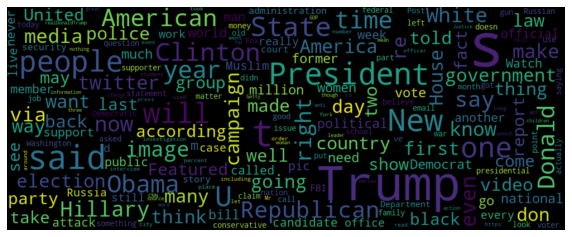

In [11]:
#For fake news 

from wordcloud import WordCloud

fake_data = df[df["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 1000, height=400 ,max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

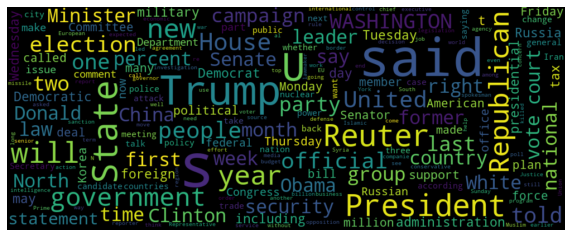

In [12]:
#For true news
real_data = df[df["class"] == 1]
all_words = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width= 1000, height= 400, max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

class
0    23481
1    21417
Name: text, dtype: int64


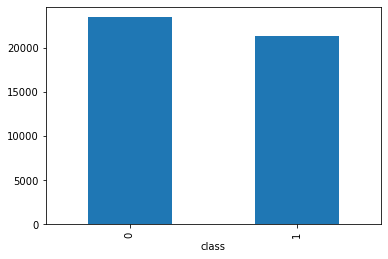

In [13]:
#how many fake and true news
print(df.groupby(['class'])['text'].count())
df.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

### Drop title, subject, date.

In [14]:
new_data = df.drop(["title","subject","date"], axis=1)
new_data.head()

In [15]:
new_data

,text,class
20526,PRISTINA (Reuters) - Kosovo s newly-elected pr...,1
22839,21st Century Wire says Everything changed on 9...,0
17629,ANKARA (Reuters) - Turkey will gradually close...,1
12378,https://twitter.com/RiggsReport/status/7986862...,0
19411,Facebook has announced plans to check for fak...,0
...,...,...
12693,MALE (Reuters) - The Maldives government signe...,1
377,No one likes to be touched by Donald Trump n...,0
3435,NEW DELHI (Reuters) - India remains committed ...,1
11399,"BAUCHI, Nigeria (Reuters) - Nigeria s military...",1


### Checking any null value.

In [16]:
new_data.isnull().sum()

text     0
class    0
dtype: int64

## Removing Unnecesary characters


In [20]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [21]:
new_data["text"] = new_data["text"].apply(wordopt)

In [22]:
new_data.head()

,text,class
20526,pristina reuters kosovo s newly elected pr...,1
22839,century wire says everything changed on ov...,0
17629,ankara reuters turkey will gradually close...,1
12378,https twitter com riggsreport status https ...,0
19411,facebook has announced plans to check for fak...,0


In [23]:
X = df["text"]
Y = df["class"]

## Training data set and Testing set.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify=Y, test_size=0.25)

## Vectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer(stop_words='english',max_df=0.7)
Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)

## Logistic Regression

In [86]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xv_train,Y_train)

LogisticRegression()

In [87]:
pred_lr=lr.predict(Xv_test)
lr.score(Xv_test,Y_test)

0.9862806236080178

In [88]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5871
           1       0.98      0.99      0.99      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



## Random Forest Classifier 

In [29]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(Xv_train, Y_train)

RandomForestClassifier(random_state=0)

In [30]:
pred_rfc = rfc.predict(Xv_train)
rfc.score(Xv_test,Y_test)

0.9885968819599109

In [31]:
print(classification_report(Y_train, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17610
           1       1.00      1.00      1.00     16063

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673



## Decision Tree

In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(Xv_train, Y_train)

DecisionTreeClassifier()

In [34]:
pred_dt = dt.predict(Xv_test)
dt.score(Xv_test,Y_test)

0.9953674832962138

In [35]:
print(classification_report(Y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5871
           1       1.00      0.99      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [56]:
#confusion_matrix(Y_test,pred_dt, labels=[0,1])

## Passive Aggresive Classifier 

In [74]:
#PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(Xv_train,Y_train)

PassiveAggressiveClassifier(max_iter=50)

In [75]:
y_pred=pac.predict(Xv_test)
score=accuracy_score(Y_test,y_pred)
print(f'The total Accurac is : {round(score*100,2)}%')

The total Accurac is : 99.29%


In [76]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5871
           1       0.99      0.99      0.99      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



## Naive Beyes 

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipe=Pipeline([('tfdif',TfidfVectorizer(stop_words='english')), ('nbmodel', MultinomialNB())])

In [78]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('tfdif', TfidfVectorizer(stop_words='english')),
                ('nbmodel', MultinomialNB())])

In [79]:
pip_pred= pipe.predict(X_test)
score=accuracy_score(Y_test,pip_pred)
print(score)

0.9378173719376391


In [80]:
print(classification_report(Y_test, pip_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5871
           1       0.94      0.93      0.93      5354

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



In [81]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


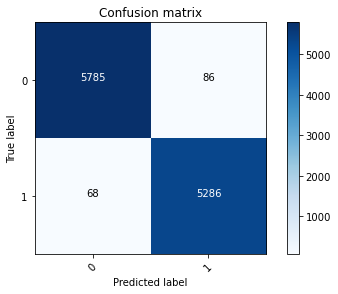

In [82]:
#Logistic Regression
cm = metrics.confusion_matrix(Y_test,pred_lr)
plot_confusion_matrix(cm, classes=[0, 1])

Confusion matrix, without normalization


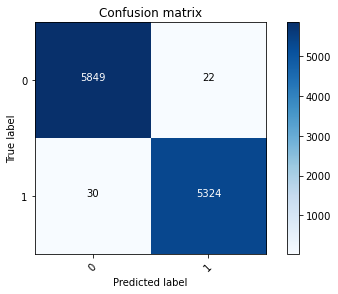

In [83]:
#Decision Tree
cm = metrics.confusion_matrix(Y_test,pred_dt)
plot_confusion_matrix(cm, classes=[0, 1])

Confusion matrix, without normalization


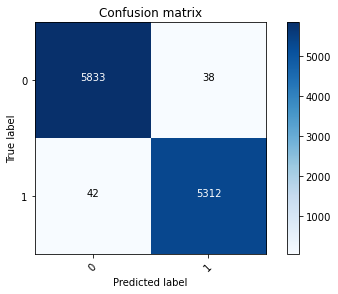

In [84]:
#Passive Agressive Clasifier
cm = metrics.confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(cm, classes=[0, 1])

Confusion matrix, without normalization


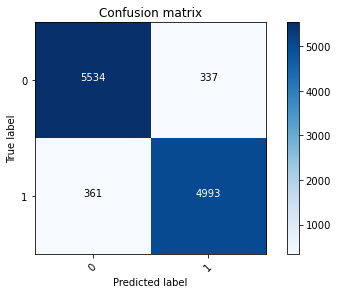

In [85]:
#Naive Bayes
cm = metrics.confusion_matrix(Y_test,pip_pred)
plot_confusion_matrix(cm, classes=[0, 1])